In [1]:
import requests, pandas, time, datetime
from bs4 import BeautifulSoup
base = 'https://www.officeholidays.com/countries'

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
req = requests.get(base)

In [4]:
soup = BeautifulSoup(req.text)

In [5]:
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))
    

In [6]:
country_links = [x for x in links if type(x) == str and 'countries' in x]

In [7]:
def get_table_from_link(country_link):
    country_name = country_link.split('/countries/')[1]
    req = requests.get(country_link)
    df = pandas.read_html(req.text)[0]
    df['country_name'] = country_name
    return df

In [8]:
country_links.reverse()
country_links.pop()


'https://www.officeholidays.com/countries'

In [9]:
country_links.pop()

'https://www.officeholidays.com/countries'

In [10]:
country_links.pop()

'https://www.officeholidays.com/countries/by-continent'

In [11]:
holidays = []
for link in country_links:
    try:
        holidays.append(get_table_from_link(link))
    except:
        print('Failed: %s' % link.split('/countries')[1] )
    

In [12]:
df = pandas.concat(holidays)

In [13]:
df['date'] =  df['Date'].apply(lambda x: datetime.datetime.strptime(x + ' 2020','%b %d %Y',))
df['day_of_week'] = df.date.apply(lambda x: x.strftime('%w'))
df['week_number'] = df.date.apply(lambda x: x.strftime('%W'))
df['week_commencing'] = df.apply(lambda x: (x['date'] - datetime.timedelta(days=int(x['day_of_week']))).strftime('%Y-%m-%d')
                                 ,axis=1)
df['date_as_str'] = df.date.apply(lambda x: x.strftime('%Y-%m-%d'))

## Full Year Public Holidays

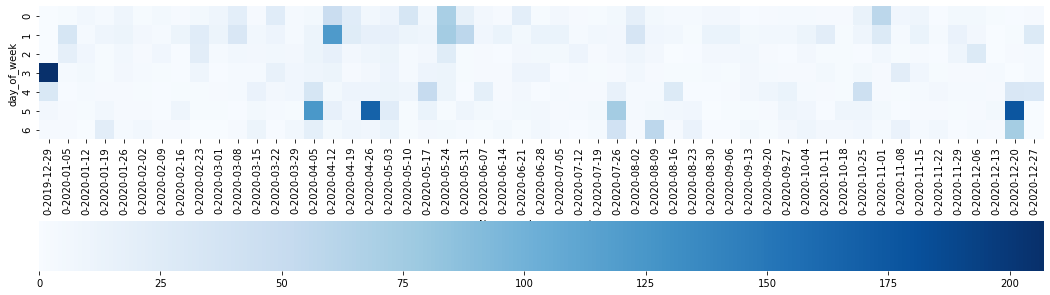

In [14]:
fig, ax = plt.subplots(figsize=(18,10))         

sns.heatmap(df.groupby(['day_of_week','week_commencing']).size().reset_index().pivot('day_of_week','week_commencing').fillna(0).astype(int)
            ,cmap='Blues',square=True,cbar_kws={"orientation": "horizontal"})


## Top 10 Public Holiday Dates

In [15]:

top_10 = df.groupby('date').size().reset_index().rename(columns={0:'number of countries'}).sort_values('number of countries',ascending=False).head(10)
top_10

date  number of countries
0   2020-01-01                  207
351 2020-12-25                  177
118 2020-05-01                  167
97  2020-04-10                  124
100 2020-04-13                  122
142 2020-05-25                   74
209 2020-07-31                   74
352 2020-12-26                   73
141 2020-05-24                   71
300 2020-11-01                   59

In [16]:
pandas.options.display.max_rows = 500

In [17]:
df[df.date.isin(top_10.date)].groupby(['country_name','date_as_str']).size().reset_index().pivot('country_name','date_as_str',0).fillna(0).astype(int)

date_as_str                       2020-01-01  2020-04-10  2020-04-13  \
country_name                                                           
afghanistan                                0           0           0   
albania                                    1           0           0   
algeria                                    1           0           0   
american-samoa                             1           1           0   
andorra                                    1           1           1   
angola                                     1           1           0   
anguilla                                   1           1           1   
antigua-and-barbuda                        1           1           1   
argentina                                  1           1           0   
armenia                                    1           0           1   
aruba                                      1           1           1   
australia                                  1           1           1   
austria                                    1           0           1   
azerbaijan                                 1           0           0   
bahamas                                    1           1           1   
bahrain                                    1           0           0   
bangladesh                                 0           0           1   
barbados                                   1           1           1   
belarus                                    1           0           0   
belgium                                    1           0           1   
belize                                     1           1           1   
benin                                      1           0           1   
bermuda                                    1           1           0   
bhutan                                     0           0           0   
bolivia                                    1           1           0   
bonaire-st-eustatius-saba                  1           1           1   
bosnia-and-herzegovina                     1           1           1   
botswana                                   1           1           1   
brazil                                     1           1           0   
british-virgin-islands                     1           1           1   
brunei                                     1           0           0   
bulgaria                                   1           0           0   
burkina-faso                               1           0           1   
burundi                                    1           0           0   
cambodia                                   1           0           0   
cameroon                                   1           1           0   
canada                                     1           1           1   
cape-verde                                 1           0           0   
cayman-islands                             1           1           1   
central-african-republic                   1           0           1   
chad                                       1           0           1   
chile                                      1           1           0   
china                                      1           0           0   
colombia                                   1           1           0   
comoros                                    1           0           0   
congo                                      1           0           1   
costa-rica                                 1           1           0   
croatia                                    1           0           1   
cuba                                       1           1           0   
curacao                                    1           1           1   
cyprus                                     1           0           0   
czech-republic                             1           1           1   
denmark                                    1           1           1   
djibouti                                